# Teste de todos os modelos de Regressão

In [261]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


### Utilizando Arquivo Pickle

In [262]:
with open('dados_modelos/estimador_reg_lin.pickle', 'rb') as f:
    estimador = pickle.load(f)

In [263]:
df = pd.read_csv('dados_modelos/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [265]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

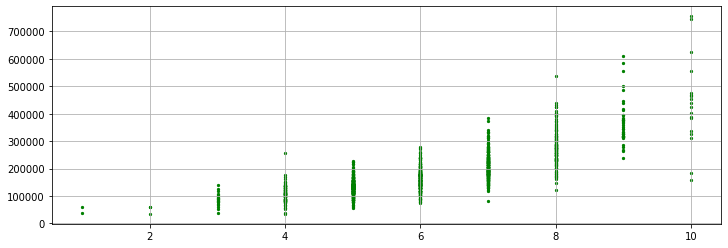

In [266]:
plt.figure(figsize=(12,4))
plt.scatter(x=df['OverallQual'],y=df['SalePrice'], c='green', s=5)
plt.grid()
# categorico...

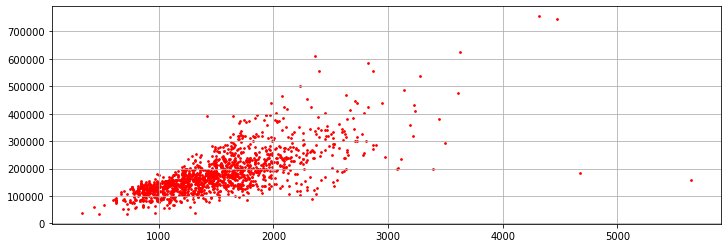

In [267]:
plt.figure(figsize=(12,4))
plt.scatter(x=df['GrLivArea'],y=df['SalePrice'], s=3, c='red')
plt.grid()
#continua!

In [268]:
df.dropna(axis=1, inplace=True)
df.shape


(1460, 62)

In [269]:
df.dropna(axis=0, inplace=True)
df.shape

(1460, 62)

In [270]:
X= df['GrLivArea']
y= df['SalePrice']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

In [272]:
estimador.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [273]:
y_pred_pickle = estimador.predict(np.array(X_test).reshape(-1,1))

(0.0, 500000.0)

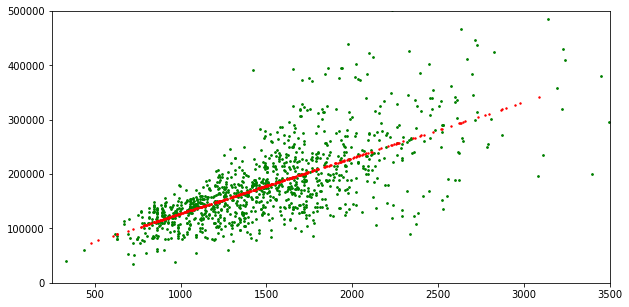

In [274]:
plt.figure(figsize=(10,5))
plt.scatter(X_train ,y_train, s=3, c='green')
plt.scatter(X_test,y_pred_pickle, s=2, c='red')
plt.xlim(250,3500)
plt.ylim(0,500000)

In [275]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred_pickle)

print(f'R2 {r2:.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred_pickle):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred_pickle, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred_pickle) * 100:.2f}')

R2 0.55
MAE 37052.45
RMSE 55843.06
MAPE 22.25


### Regressão Linear Simples

In [276]:
estimador_reg_lin = LinearRegression()
estimador_reg_lin.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred_reg_lin = estimador_reg_lin.predict(np.array(X_test).reshape(-1,1))

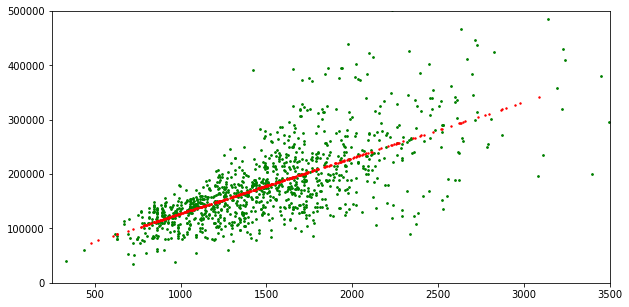

In [277]:
plt.figure(figsize=(10,5))
plt.scatter(X_train ,y_train, s=3, c='green')
plt.scatter(X_test,y_pred_reg_lin, s=2, c='red')
plt.xlim(250,3500)
plt.ylim(0,500000);

In [278]:
r2 = r2_score(y_test, y_pred_reg_lin)

print(f'R2 {r2:.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred_reg_lin):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred_reg_lin, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred_reg_lin) * 100:.2f}')

R2 0.55
MAE 37052.45
RMSE 55843.06
MAPE 22.25


### Regressão Linear Múltipla

In [279]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [280]:
X= df[['GrLivArea', 'GarageArea']]
y= df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

In [281]:
estimador_reg_lin_mult = LinearRegression()
estimador_reg_lin_mult.fit(X_train, y_train)
y_pred_reg_lin_mult = estimador_reg_lin_mult.predict(X_test)
X_test.shape

(365, 2)

Text(0.5, 0, 'SalePrice')

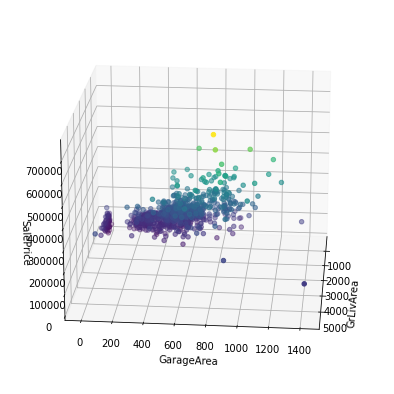

In [282]:
plt.figure(figsize=[7,7])
ax = plt.axes(projection='3d')
ax.scatter(X_train['GrLivArea'], X_train['GarageArea'] ,y_train, c=y_train, cmap='viridis')
ax.view_init(20, 5)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_zlabel('SalePrice')


In [283]:
r2 = r2_score(y_test, y_pred_reg_lin_mult)

print(f'R2 {r2:.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred_reg_lin_mult):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred_reg_lin_mult, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred_reg_lin_mult) * 100:.2f}')

R2 0.66
MAE 31130.73
RMSE 48731.14
MAPE 19.17


### Regressão Logística

In [285]:
estimador = LogisticRegression()
estimador.fit(X_train, y_train)

C:\Users\grego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()